In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.tri import Triangulation

# Custom modules
import sys 
sys.path.append("../environments/")
import gridworlds
import td_learning

# Temporal Difference Learning

In [2]:
# Cliff Walking gridworld from Sutton & Barto (2018), Example 6.6
env = gridworlds.Cliff_Walking()
episodes = 50000

In [3]:
# Functions for plotting the Q-values
# https://stackoverflow.com/questions/66048529/how-to-create-a-heatmap-where-each-cell-is-divided-into-4-triangles

def triangulation_for_triheatmap(M, N):
    xv, yv = np.meshgrid(np.arange(-0.5, M), np.arange(-0.5, N))
    xc, yc = np.meshgrid(np.arange(0, M), np.arange(0, N))
    x = np.concatenate([xv.ravel(), xc.ravel()])
    y = np.concatenate([yv.ravel(), yc.ravel()])
    cstart = (M + 1) * (N + 1)

    trianglesN = [(i + j * (M + 1), i + 1 + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesE = [(i + 1 + j * (M + 1), i + 1 + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesS = [(i + 1 + (j + 1) * (M + 1), i + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesW = [(i + (j + 1) * (M + 1), i + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    
    return [Triangulation(x, y, triangles) for triangles in [trianglesN, trianglesE, trianglesS, trianglesW]]

def plot_Q(Q, env, name):
    N, M = env.size
    values = np.transpose(Q)
    triangul = triangulation_for_triheatmap(M, N)
    norms = [plt.Normalize(-0.5, 1) for _ in range(4)]
    fig, ax = plt.subplots(figsize=(20, 20))

    my_cmap = cm.get_cmap("RdYlGn").copy()
    my_cmap.set_over("gray")
    imgs = [ax.tripcolor(t, val.ravel(), cmap=my_cmap, vmin=(np.min(Q) * 0.2), vmax=-0.0001, ec="white") 
            for t, val in zip(triangul, values)]
    for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
        for i in range(M):
            for j in range(N):
                v = np.reshape(val, (N, M))[j, i]
                if v != 0:
                    ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f"{v:.1f}", color="black", ha="center", va="center")
                elif i == env.size[1]-1 and j == env.size[0]-1:
                    ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f"{v:.1f}", color="black", ha="center", va="center")
                    

    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.invert_yaxis()
    ax.margins(x=0, y=0)
    ax.set_aspect("equal", "box")  # square cells
    plt.tight_layout()
    plt.title(name, fontsize=20, pad=20)
    plt.show()

## SARSA

100%|██████████| 50000/50000 [00:31<00:00, 1576.04it/s]


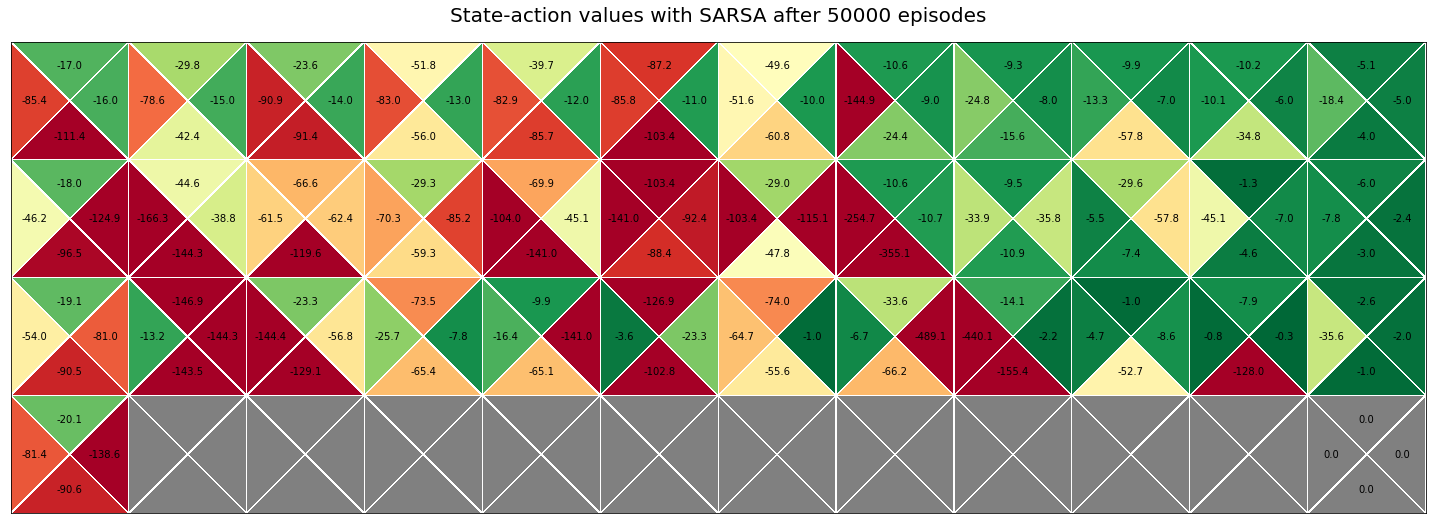

In [9]:
pi, Q = td_learning.sarsa_glie(env, episodes=episodes)
plot_Q(Q, env, "State-action values with SARSA after {} episodes".format(episodes))

## Expected SARSA

100%|██████████| 50000/50000 [00:37<00:00, 1342.28it/s]


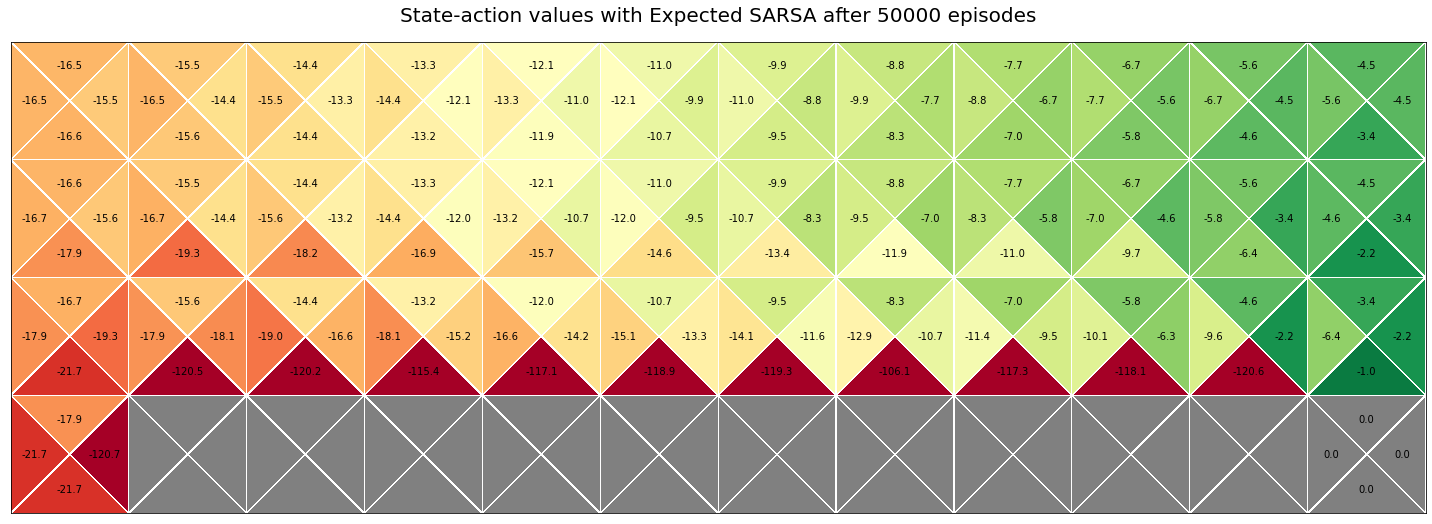

In [5]:
pi, Q = td_learning.expected_sarsa(env, episodes=episodes)
plot_Q(Q, env, "State-action values with Expected SARSA after {} episodes".format(episodes))

## Q-Learning

100%|██████████| 50000/50000 [00:28<00:00, 1732.14it/s]


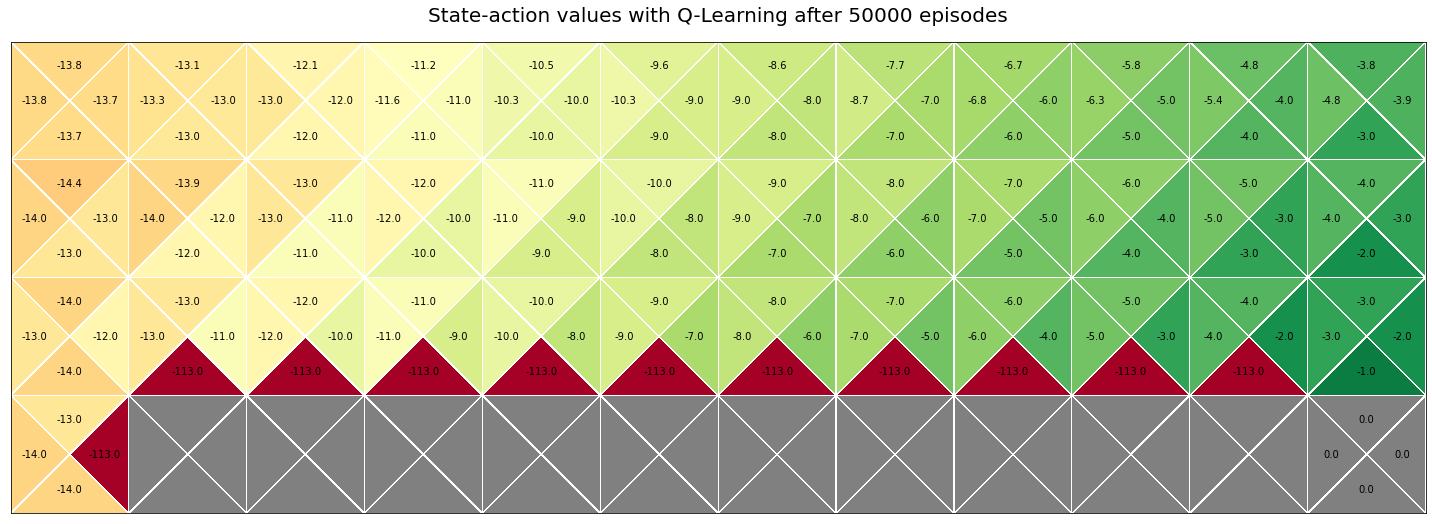

In [6]:
pi, Q = td_learning.q_learning(env, episodes=episodes)
plot_Q(Q, env, "State-action values with Q-Learning after {} episodes".format(episodes))

## Double Q-Learning

100%|██████████| 50000/50000 [00:34<00:00, 1463.78it/s]


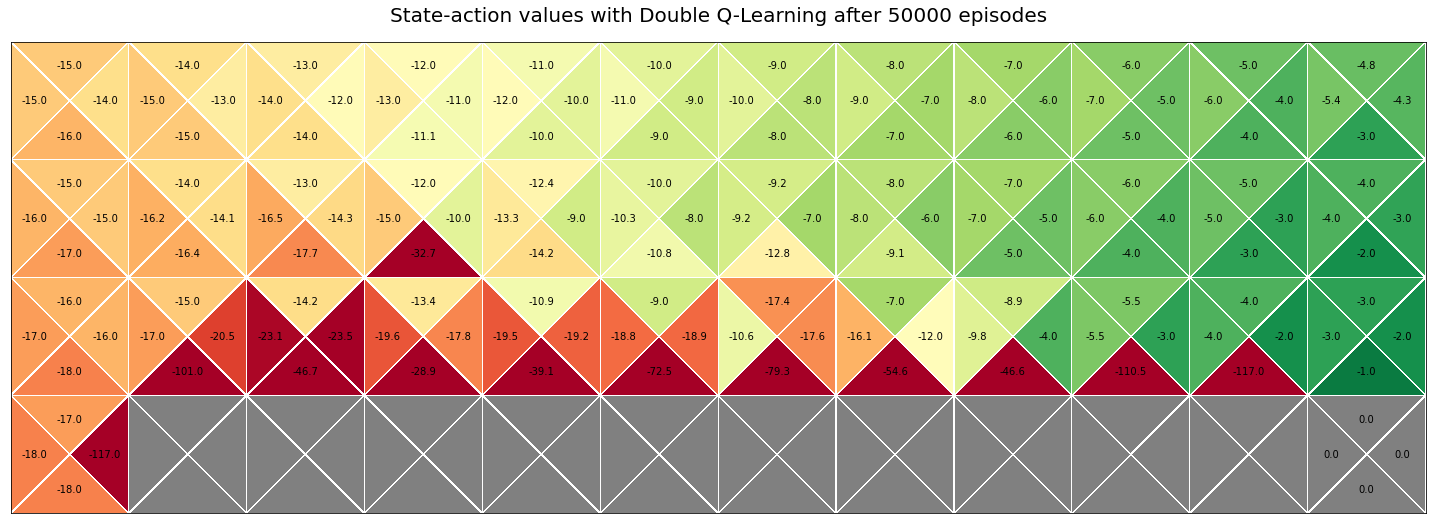

In [7]:
pi, Q = td_learning.double_q_learning(env, episodes=episodes)
plot_Q(Q, env, "State-action values with Double Q-Learning after {} episodes".format(episodes))